In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df = pd.read_csv(r'..\data\heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
label=df["target"]
df.drop("target",axis=1,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


<AxesSubplot:>

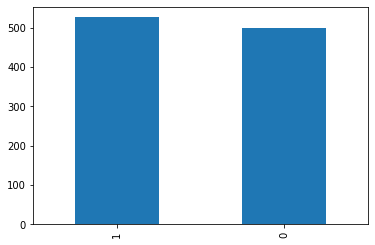

In [5]:
label.value_counts().plot(kind="bar")

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [7]:
categorical_features=["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
df[categorical_features]=df[categorical_features].astype("category")

In [8]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [9]:
df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
dtype: object

In [10]:
continuous_features=set(df.columns) - set(categorical_features)
scaler = StandardScaler()
df_norm = df.copy()
df_norm[list(continuous_features)]=scaler.fit_transform(df[list(continuous_features)])
# #df_norm=pd.DataFrame(df_norm,columns=list(continuous_features))
df_norm

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2


In [11]:
# Tạo ra biến chỉ số cho mỗi thành phần thuộc tính không liên tục
df_norm_dummies=pd.get_dummies(df_norm)
df_norm_dummies

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [12]:
import pickle

with open('heart/X.pkl', 'wb') as f:
    pickle.dump(df_norm_dummies, f)

with open('heart/y.pkl', 'wb') as f:
    pickle.dump(label, f)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(df_norm_dummies, label, test_size=0.15, stratify=label, random_state=10)

In [14]:
print('Độ dài tập train: ', len(X_train))
print('Độ dài tập nhãn train: ', len(y_train))

Độ dài tập train:  871
Độ dài tập nhãn train:  871


SVC()


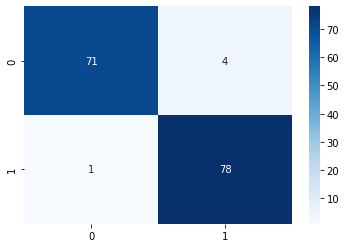

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.95      0.99      0.97        79

    accuracy                           0.97       154
   macro avg       0.97      0.97      0.97       154
weighted avg       0.97      0.97      0.97       154

LogisticRegression()


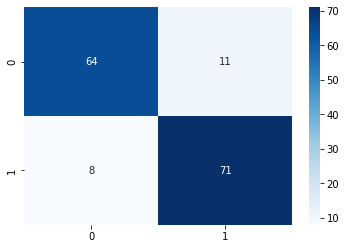

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        75
           1       0.87      0.90      0.88        79

    accuracy                           0.88       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.88      0.88      0.88       154

GaussianNB()


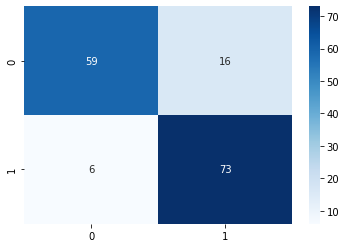

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        75
           1       0.82      0.92      0.87        79

    accuracy                           0.86       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.86      0.86      0.86       154

DecisionTreeClassifier()


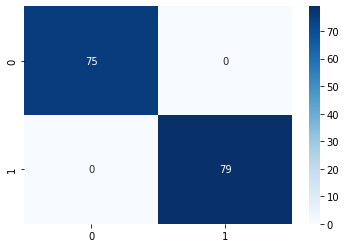

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [15]:
# Ở đây sử dụng 4 mô hình để dự đoán bệnh:
# + Mô hình SVM
# + Mô hình hồi quy logistic
# + Mô hình naive bayes sử dụng phân phối Gaussian
# + Mô hình cây quyết định
models = [SVC(), LogisticRegression(), GaussianNB(), DecisionTreeClassifier()]

for model in models:
    print(model)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, y_pred))

<AxesSubplot:>

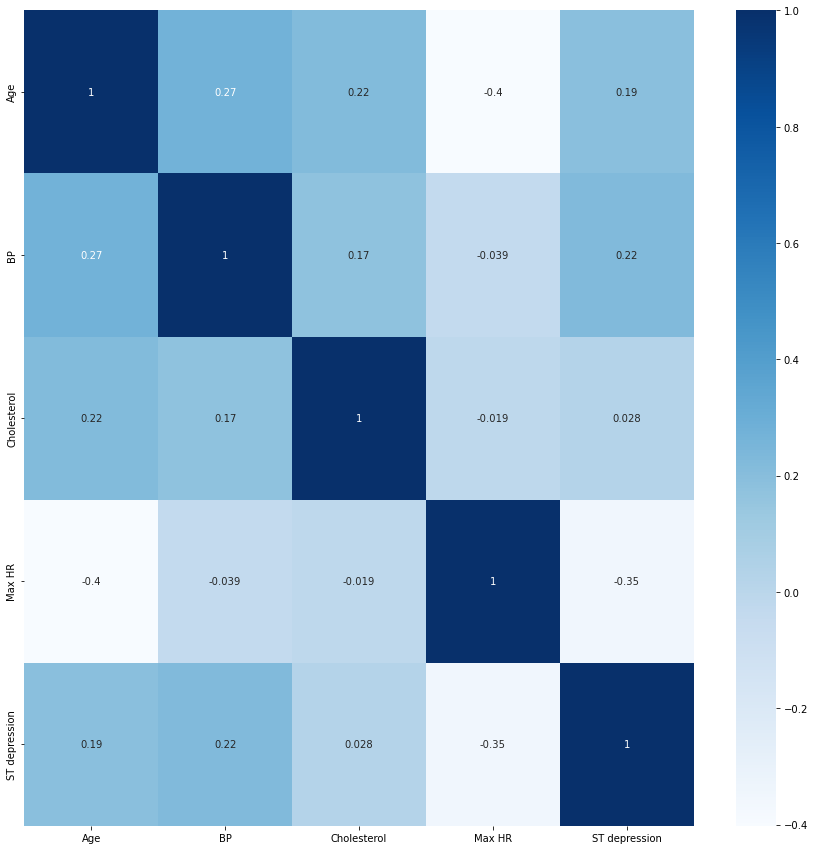

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df_norm.corr(),cmap=plt.cm.Blues,annot=True)

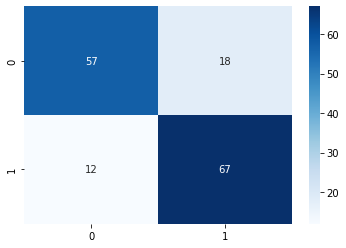

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        75
           1       0.79      0.85      0.82        79

    accuracy                           0.81       154
   macro avg       0.81      0.80      0.80       154
weighted avg       0.81      0.81      0.80       154



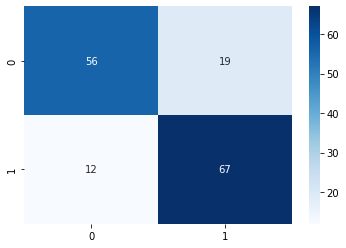

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        75
           1       0.78      0.85      0.81        79

    accuracy                           0.80       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.80      0.80      0.80       154



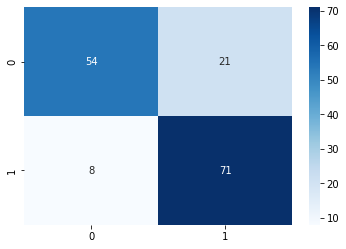

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        75
           1       0.77      0.90      0.83        79

    accuracy                           0.81       154
   macro avg       0.82      0.81      0.81       154
weighted avg       0.82      0.81      0.81       154



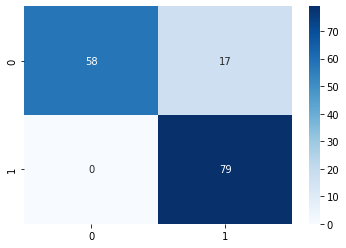

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        75
           1       0.82      1.00      0.90        79

    accuracy                           0.89       154
   macro avg       0.91      0.89      0.89       154
weighted avg       0.91      0.89      0.89       154



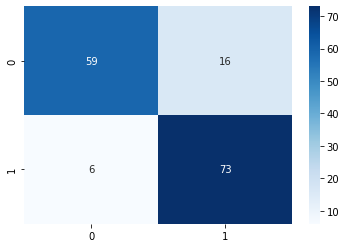

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        75
           1       0.82      0.92      0.87        79

    accuracy                           0.86       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.86      0.86      0.86       154



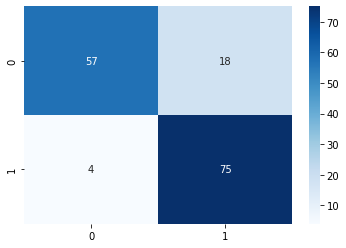

              precision    recall  f1-score   support

           0       0.93      0.76      0.84        75
           1       0.81      0.95      0.87        79

    accuracy                           0.86       154
   macro avg       0.87      0.85      0.86       154
weighted avg       0.87      0.86      0.86       154



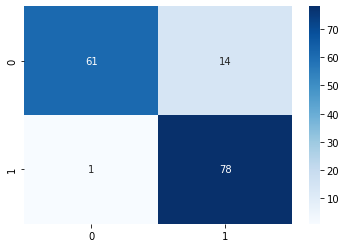

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        75
           1       0.85      0.99      0.91        79

    accuracy                           0.90       154
   macro avg       0.92      0.90      0.90       154
weighted avg       0.91      0.90      0.90       154



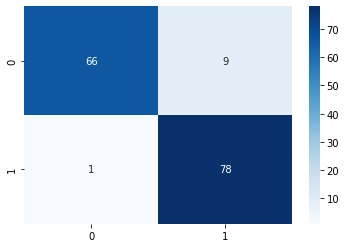

              precision    recall  f1-score   support

           0       0.99      0.88      0.93        75
           1       0.90      0.99      0.94        79

    accuracy                           0.94       154
   macro avg       0.94      0.93      0.93       154
weighted avg       0.94      0.94      0.93       154



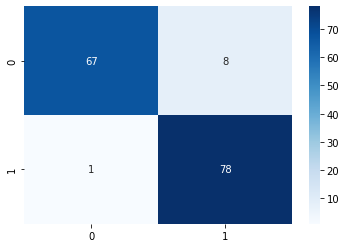

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        75
           1       0.91      0.99      0.95        79

    accuracy                           0.94       154
   macro avg       0.95      0.94      0.94       154
weighted avg       0.95      0.94      0.94       154



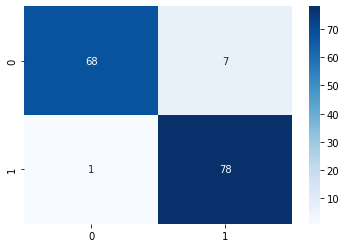

              precision    recall  f1-score   support

           0       0.99      0.91      0.94        75
           1       0.92      0.99      0.95        79

    accuracy                           0.95       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.95      0.95      0.95       154



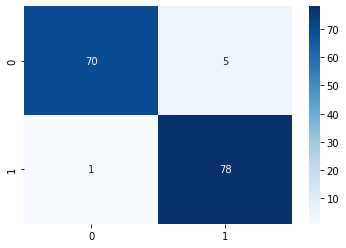

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        75
           1       0.94      0.99      0.96        79

    accuracy                           0.96       154
   macro avg       0.96      0.96      0.96       154
weighted avg       0.96      0.96      0.96       154



In [16]:
n_dimensions=[i for i in range(2,len(df.columns))]

for dim in n_dimensions:
    pca = PCA(dim)
    df_norm_reduc=pd.DataFrame(pca.fit_transform(df_norm), columns=[i for i in range(dim)])
    
    X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df_norm_reduc), label, test_size = 0.15, stratify = label, random_state = 10)
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, y_pred))